# PyTorch tutorial

This notebook serves as a hands-on ***tutorial*** designed for individuals who want to explore and better understand ***PyTorch***. In particular, we will focus on its application in ***computer vision***, demonstrating how to build and train models for image classification tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial


import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split

from torchvision import datasets
import torchvision.models as models
import torchvision.transforms as T

**Most important points to explore :**

- Loading Data and Devices
- Autograd
- Optimizer
- Loss
- Model
- DataLoader
- Split
- Saving/Loading Weights
- Evaluation
- Visualization

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# Importing dataset

In this notebook, we will use the **FashionMNIST** dataset available in the **torchvision** package. This dataset consists of grayscale images of Zalando’s fashion articles, such as shoes, shirts, and bags. It is commonly used as a benchmark for image classification tasks.

In [3]:
train_data = datasets.FashionMNIST(
    root="data", 
    train=True,
    download=True, 
    transform=T.ToTensor(), 
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=T.ToTensor()
)

In [4]:
len(train_data)

60000

In [5]:
len(test_data)

10000

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

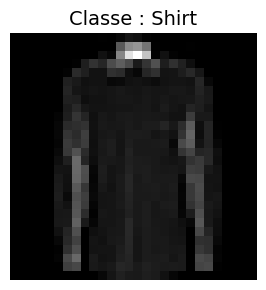

In [7]:
from PIL import Image

img_idx = torch.randint(0, len(train_data), (1,))[0]
img_tensor, label = train_data[img_idx]
to_pil = T.ToPILImage()
img = to_pil(img_tensor)
class_name = class_names[label]

plt.figure(figsize=(3,3))
plt.imshow(img, cmap="gray")
plt.title(f"Classe : {class_name}", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


# Preparing the data

In deep learning, we typically use the **mini-batch gradient descent** algorithm.
Therefore, **DataLoaders** are designed to efficiently organize datasets into batches, making it easier to feed data to the model during training.

In [8]:
batch_size = 32

train_dataloader = DataLoader(train_data,
    batch_size=batch_size,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=batch_size,
    shuffle=False
)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {batch_size}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


# Modeling 

Convolutional Neural Networks (CNNs) are one of the fundamental architectures in computer vision. A typical CNN architecture is composed of ***two main parts***:

1. ***Convolutional layers*** – These layers are responsible for feature extraction.
They apply convolutional filters to the input image to detect patterns such as edges, textures, or more complex shapes in deeper layers.

2. ***Fully connected layers*** – These layers act as the “classifier” part of the network.
They take the high-level features extracted by the convolutional layers and use them to make predictions, such as identifying the class of an image.

<p align="center">
    <img src="pytorch_cnn_lenet.jpg" width="750">
</p>

In [ ]:
class Model_cnn(nn.Module):
    def __init__(self, num_classes):
        super(Model_cnn, self).__init__()


        # Convolution Layers
        self.conv1 = nn.Conv2d(in_channels = 1 , out_channels = 20 , kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels = 20 , out_channels = 50 , kernel_size = 3)
        # self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)


        # Fully connected layer
        self.fc1 = nn.Linear(50**, 500)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(500, num_classes)


    def forward(self, image):
        out = self.conv1(image)
        out = self.pool1(out)
        out = self.conv2(out)
        out = self.pool1(out)

        out = torch.flatten(out, 1)

        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)

        return out
